**DSCI 100: GROUP PROJECT PROPOSAL**

**I. Introduction**

Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal

Clearly state the question you will try to answer with your project

Identify and describe the dataset that will be used to answer the question


**II. Preliminary exploratory data analysis**

Demonstrate that the dataset can be read from the web into R 

Clean and wrangle your data into a tidy format

Using only training data, summarize the data in at least one table (this is exploratory data analysis). 

An example of a useful table could be one that reports the number of observations in each class, the means of the predictor
variables you plan to use in your analysis and how many rows have missing data. 

Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do
(this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.


In [31]:
library(repr)
library(tidyverse)
library(tidymodels)
library(dplyr)
library(ggplot2)
library(RColorBrewer)
options(repr.matrix.max.rows = 6)

Rows: 30000 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (25): ID, LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, RE_SEP, RE_AUG, RE_J...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,RE_SEP,RE_AUG,RE_JUL,RE_JUN,⋯,BILL_JUN,BILL_MAY,BILL_APR,PAID_SEP,PAID_AUG,PAID_JUL,PAID_JUN,PAID_MAY,PAID_APR,DEFAULT
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,20000,2,2,1,24,2,2,-1,-1,⋯,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,⋯,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,⋯,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
29998,30000,1,2,2,37,4,3,2,-1,⋯,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,⋯,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,50000,1,2,1,46,0,0,0,0,⋯,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


[1] 0

DEFAULT,COUNTS
<dbl>,<int>
0,17523
1,4977


DEFAULT,BILL_SEP,BILL_AUG,BILL_JUL,BILL_JUN,BILL_MAY,BILL_APR,PAID_SEP,PAID_AUG,PAID_JUL,PAID_JUN,PAID_MAY,PAID_APR
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,51994.75,49734.04,47395.74,43457.84,40510.46,39039.91,6301.215,6649.990,5722.981,5315.723,5239.168,5850.386
1,50161.02,48755.87,46693.22,43520.09,41078.21,39807.20,3408.628,3580.924,3490.746,3299.883,3320.626,3641.878


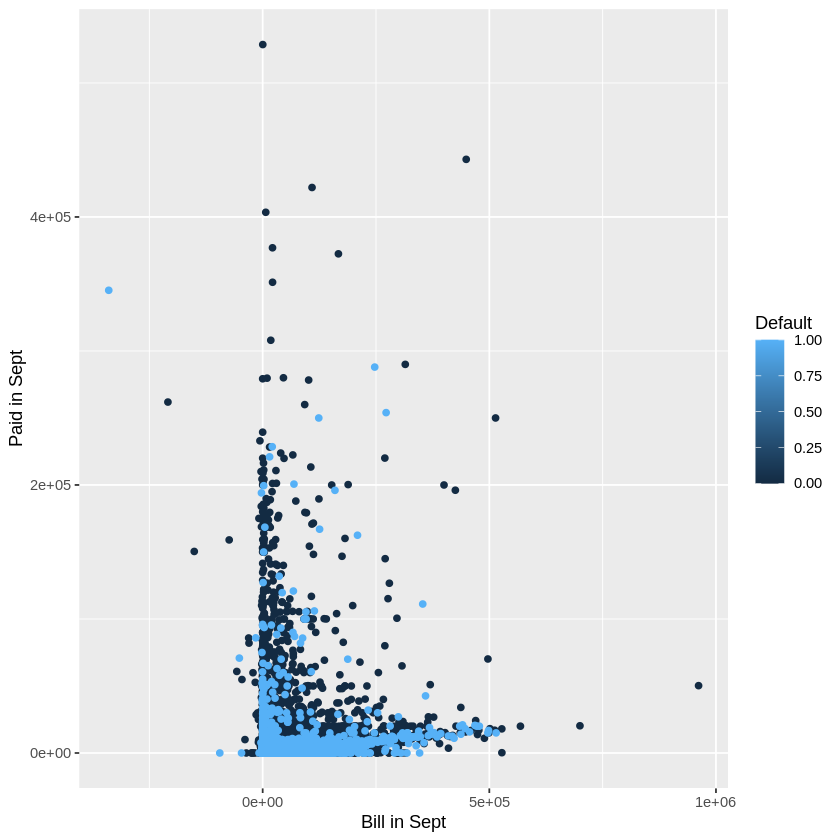

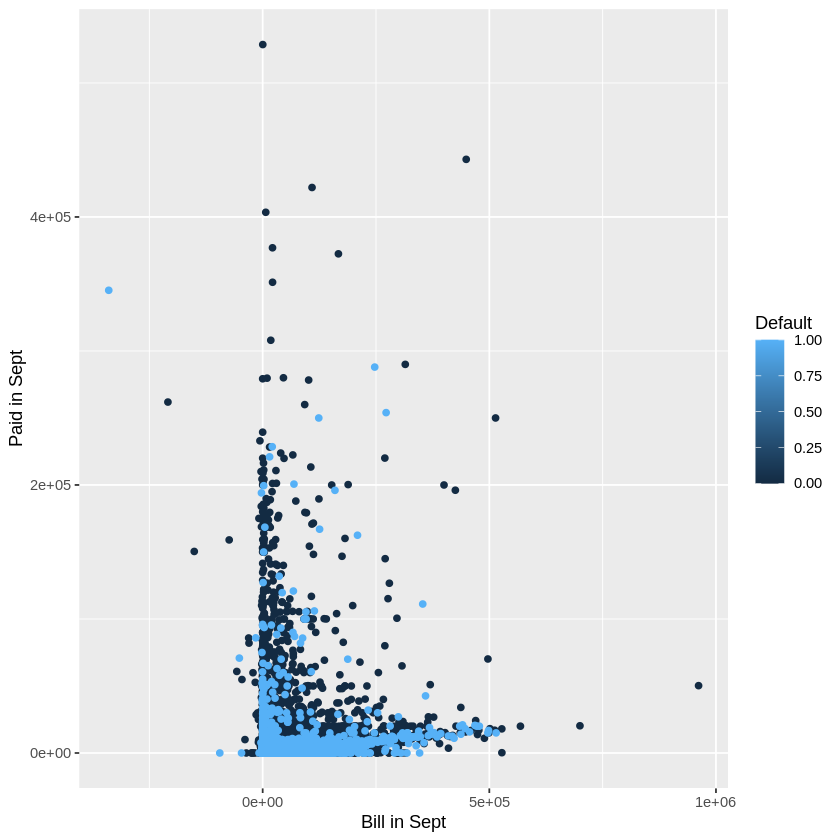

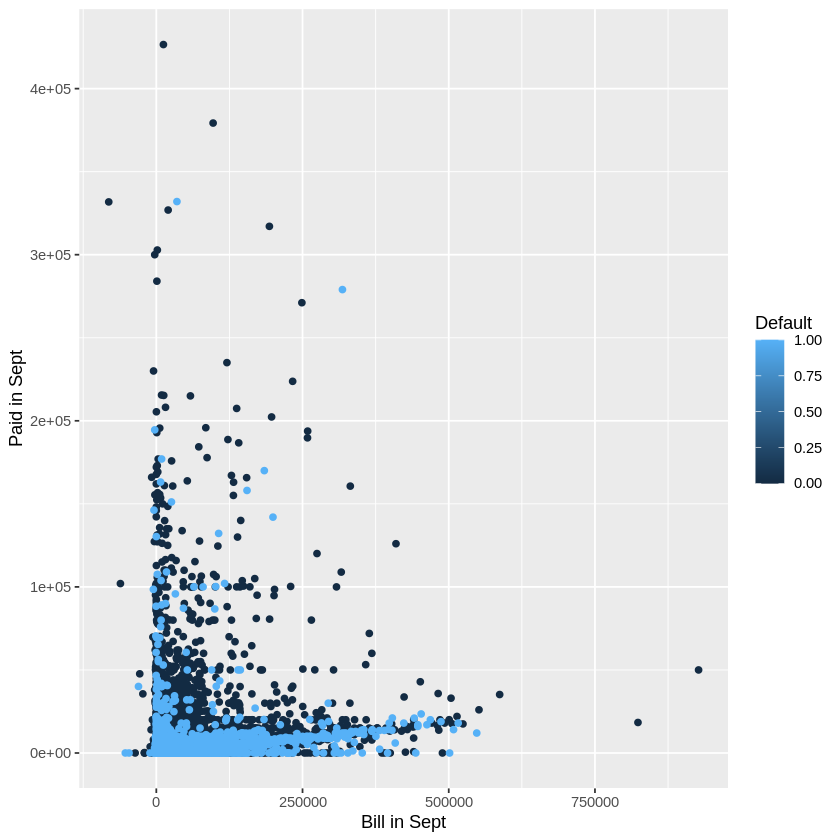

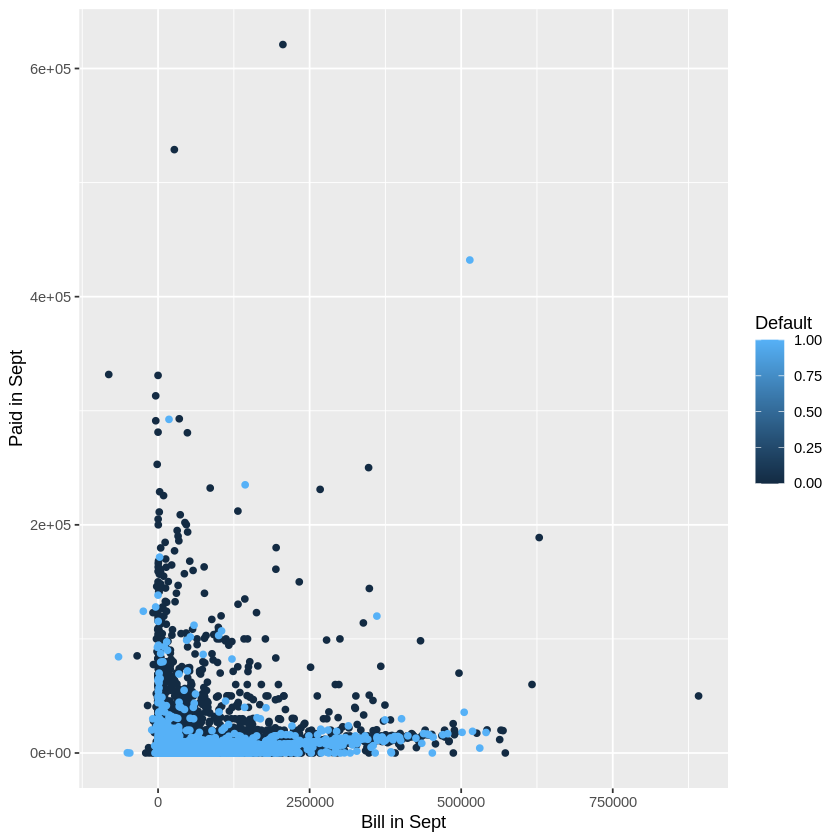

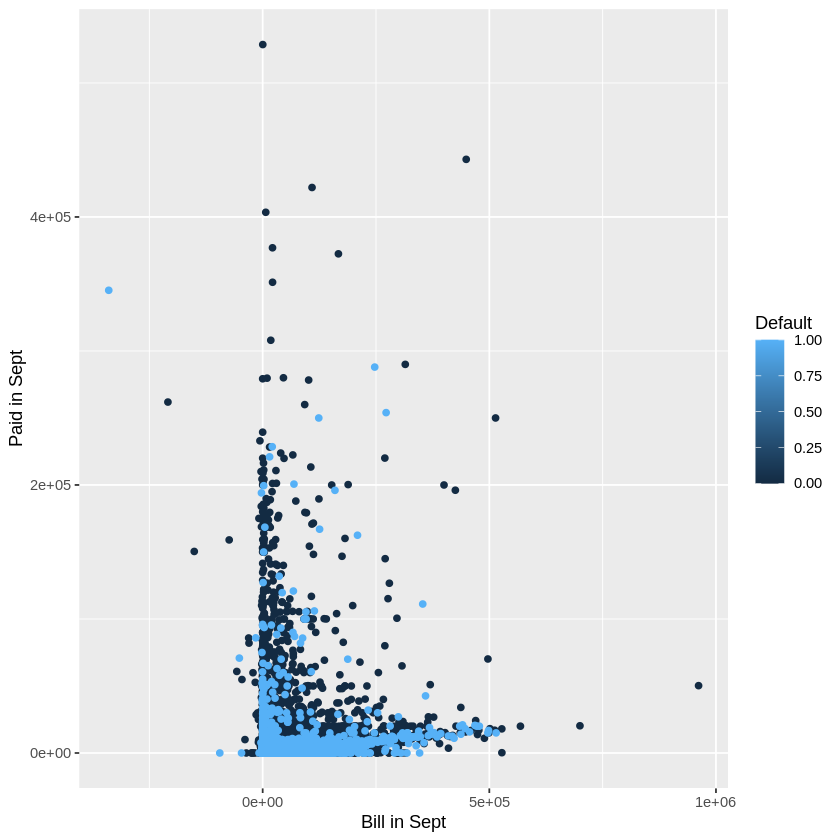

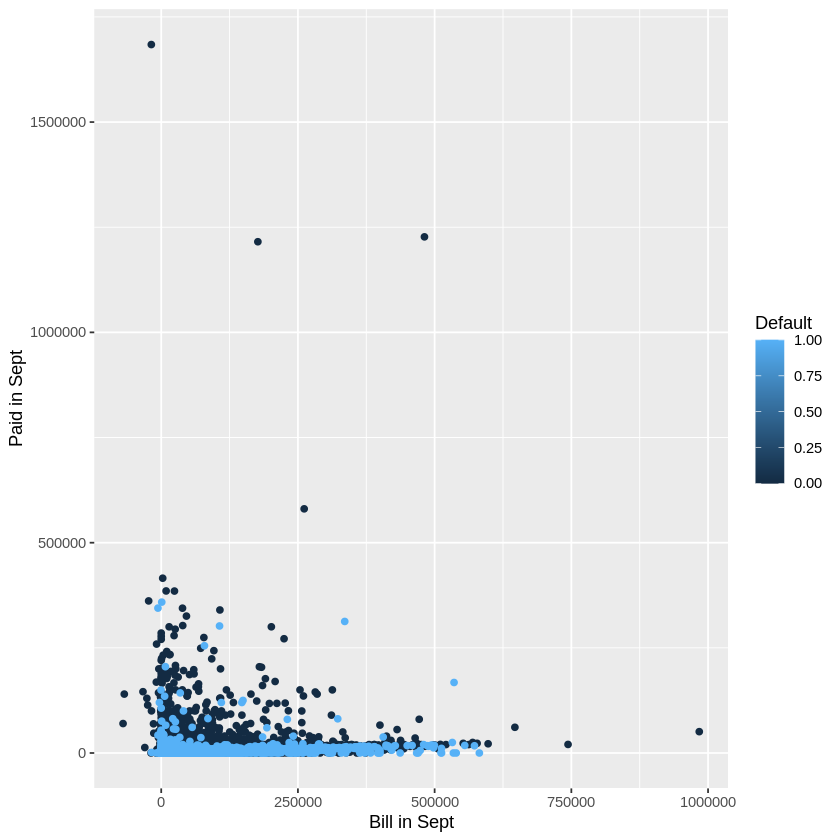

In [39]:
#READ THE DATA

credit_data<-read_csv('Dataset/default_of_credit_card_clients.csv', skip=2, col_names=c("ID","LIMIT_BAL","SEX","EDUCATION","MARRIAGE","AGE",
"RE_SEP","RE_AUG","RE_JUL","RE_JUN","RE_MAY","RE_APR",
"BILL_SEP","BILL_AUG","BILL_JUL","BILL_JUN","BILL_MAY","BILL_APR",
"PAID_SEP","PAID_AUG","PAID_JUL","PAID_JUN","PAID_MAY","PAID_APR",
"DEFAULT"))

credit_data

#SPLIT DATA INTO TRAINING AND TESTING 

credit_split <- initial_split(credit_data, prop = 0.75, strata = DEFAULT) #0.75 in training set
credit_train <- training(credit_split)
credit_test <- testing(credit_split)

#REPORTING 
    #Number of NA values 
    sum(is.na(credit_train))

    #Number of Defaults and Non Default 
    credit_default_summarize <- credit_train |>
    group_by(DEFAULT) |>
    summarize(COUNTS=n()) 
    credit_default_summarize

    #Mean of predictors 
    credit_mean_summarize <- credit_train |>
    group_by(DEFAULT) |>
    summarize(across(BILL_SEP:PAID_APR, mean))
    credit_mean_summarize

#VISUALIZATION

first_plot <- credit_train |> 
ggplot(aes(x=BILL_APR,y=PAID_APR, color=DEFAULT))+
geom_point()+
labs(x='Bill in Sept', y='Paid in Sept', color='Default')
first_plot

second_plot <- credit_train |> 
ggplot(aes(x=BILL_APR,y=PAID_APR, color=DEFAULT))+
geom_point()+
labs(x='Bill in Sept', y='Paid in Sept', color='Default')
second_plot

third_plot <- credit_train |> 
ggplot(aes(x=BILL_MAY,y=PAID_MAY, color=DEFAULT))+
geom_point()+
labs(x='Bill in Sept', y='Paid in Sept', color='Default')
third_plot 

fourth_plot <- credit_train |> 
ggplot(aes(x=BILL_JUN,y=PAID_JUN, color=DEFAULT))+
geom_point()+
labs(x='Bill in Sept', y='Paid in Sept', color='Default')
fourth_plot

fifth_plot <- credit_train |> 
ggplot(aes(x=BILL_JULY,y=PAID_JULY, color=DEFAULT))+
geom_point()+
labs(x='Bill in Sept', y='Paid in Sept', color='Default')
first_plot

sixth_plot <- credit_train |> 
ggplot(aes(x=BILL_AUG,y=PAID_AUG, color=DEFAULT))+
geom_point()+
labs(x='Bill in Sept', y='Paid in Sept', color='Default')
sixth_plot



In [4]:


# #Tidy
# credit_tidy <- pivot_longer(credit_data,
#   cols = RE_SEP:RE_APR,
#   names_to = "MONTH_REPAYMENT",
#   values_to = "REPAYMENT_STATUS") |>

# pivot_longer(
#   cols = BILL_SEP:BILL_APR,
#   names_to = "MONTH_BILL",
#   values_to = "BILL_AMOUNT") |>

# pivot_longer(
#   cols = PAID_SEP:PAID_APR,
#   names_to = "MONTH_PAID",
#   values_to = "PAID_AMOUNT")

# head(credit_tidy,n=6)














**III. Method**

Explain how you will conduct either your data analysis and which variables/columns you will use. 
Note - you do not need to use all variables/columns that exist in the raw data set. 
In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?

Describe at least one way that you will visualize the results


**VI. Expected outcomes and significance**




What do you expect to find?

What impact could such findings have?

What future questions could this lead to?
